# Sistem Rekomendasi Novel Berbasis Genre dan Metadata Buku

- **Nama:** Adam Firmansyah
- **Email:** adamfirmansyah0802@gmail.com
- **ID Dicoding:** MC009D5Y0435

# Project Overview

Di era digital, pembaca memiliki akses ke jutaan novel dengan berbagai genre, penulis, dan penerbit. Dengan begitu banyak pilihan, seringkali pengguna kesulitan menemukan novel yang sesuai dengan selera dan preferensi mereka. Hal ini menimbulkan kebutuhan akan sistem rekomendasi yang mampu memberikan saran novel yang relevan dan personal berdasarkan karakteristik buku dan preferensi pembaca.

# Business Understanding

## Problem Statements

1. Novel apa saja yang paling populer dan disukai berdasarkan genre dan metadata buku?

2. Fitur atau atribut apa saja dari novel (misalnya genre, deskripsi, tahun terbit) yang berpengaruh terhadap kesukaan pembaca?

3. Bagaimana cara membangun sistem rekomendasi novel yang memberikan saran sesuai dengan preferensi pengguna, khususnya berdasarkan genre dan metadata buku?

## Goals

Mengidentifikasi novel-novel yang populer dan banyak diminati berdasarkan genre dan metadata lainnya.

Menentukan atribut buku yang berperan penting dalam menentukan rekomendasi yang sesuai.

Membangun sistem rekomendasi berbasis Content-Based Filtering yang menggunakan fitur genre, deskripsi, dan metadata lain untuk memberikan rekomendasi novel yang personal dan relevan.

## Solution Approach

1. Data Exploration & Preprocessing

- Memahami distribusi genre, deskripsi, dan atribut lain dalam dataset.

- Membersihkan data dan menyiapkan fitur untuk sistem rekomendasi.

2. Feature Extraction

- Mengolah data teks seperti genre dan deskripsi menggunakan teknik seperti TF-IDF untuk representasi fitur buku.

3. Content-Based Filtering

- Menggunakan algoritma cosine similarity untuk menghitung kemiripan antar buku berdasarkan fitur teks.

- Membangun fungsi rekomendasi yang memberikan daftar novel serupa sesuai input pengguna.



# Data Understanding

Tahap ini merupakan proses analisis data yang bertujuan untuk memperoleh pemahaman yang menyeluruh mengenai dataset sebelum melanjutkan ke tahap analisis lebih lanjut.

## 1. Mengimport Library


Pada bagian ini kita mengimport seluruh library yang diperlukan untuk menganalisis

In [47]:
!pip install kaggle

In [48]:
!pip install keras

In [49]:
import os
import shutil
import zipfile
import textwrap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # Bagian dari sklearn
import tensorflow as tf
from tensorflow import keras # Bagian dari tensorflow
from tensorflow.keras import layers # Bagian dari tensorflow
from sklearn.feature_extraction.text import TfidfVectorizer # Bagian dari sklearn
from sklearn.metrics.pairwise import cosine_similarity # Bagian dari sklearn
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report # Bagian dari sklearn

## Data Loading

Tahap untuk memuat dataset yang akan digunakan agar dataset lebih mudah dipahami. Pada project kali ini, menggunakan dataset yang berasal dari Kaggle. [Link Dataset](https://www.kaggle.com/datasets/zygmunt/goodbooks-10k)

In [50]:
#!/bin/bash
!curl -L -o amazon-books.zip\
  "https://www.kaggle.com/api/v1/datasets/download/chhavidhankhar11/amazon-books-dataset"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  545k  100  545k    0     0   981k      0 --:--:-- --:--:-- --:--:--  981k


In [51]:
#membuka zip menjadi folder
with zipfile.ZipFile("/content/amazon-books.zip", "r") as zip_ref:
    zip_ref.extractall("amazon-books")

#membaca csv dalam folder
Books_df = pd.read_csv('/content/amazon-books/Amazon_Books_Scraping/Books_df.csv')
Genre_df = pd.read_csv('/content/amazon-books/Amazon_Books_Scraping/Genre_df.csv')
Sub_Genre_df = pd.read_csv('/content/amazon-books/Amazon_Books_Scraping/Sub_Genre_df.csv')


### Menampilkan beberapa baris awal data

In [102]:
# menampilkan beberapa baris Books_df
Books_df.head()

,Title,Author,Main Genre,Sub Genre,Type,Price,Rating,No. of People rated,URLs,content_features
0,The Complete Novel of Sherlock Holmes,Arthur Conan Doyle,"Arts, Film & Photography",Cinema & Broadcast,Paperback,169.00,4.4,19923.0,https://www.amazon.in/Complete-Novels-Sherlock...,"Arts, Film & Photography Cinema & Broadcast Ar..."
1,Black Holes (L) : The Reith Lectures [Paperbac...,Stephen Hawking,"Arts, Film & Photography",Cinema & Broadcast,Paperback,99.00,4.5,7686.0,https://www.amazon.in/Black-Holes-Lectures-Ste...,"Arts, Film & Photography Cinema & Broadcast St..."
2,The Kite Runner,Khaled Hosseini,"Arts, Film & Photography",Cinema & Broadcast,Kindle Edition,175.75,4.6,50016.0,https://www.amazon.in/Kite-Runner-Khaled-Hosse...,"Arts, Film & Photography Cinema & Broadcast Kh..."
3,Greenlights: Raucous stories and outlaw wisdom...,Matthew McConaughey,"Arts, Film & Photography",Cinema & Broadcast,Paperback,389.00,4.6,32040.0,https://www.amazon.in/Greenlights-Raucous-stor...,"Arts, Film & Photography Cinema & Broadcast Ma..."
4,The Science of Storytelling: Why Stories Make ...,Will Storr,"Arts, Film & Photography",Cinema & Broadcast,Paperback,348.16,4.5,1707.0,https://www.amazon.in/Science-Storytelling-Wil...,"Arts, Film & Photography Cinema & Broadcast Wi..."


In [37]:
# menampilkan beberapa baris Genre_df
Genre_df.head()

,Title,Number of Sub-genres,URL
0,Action & Adventure,0,https://www.amazon.in/gp/bestsellers/books/131...
1,"Arts, Film & Photography",11,https://www.amazon.in/gp/bestsellers/books/131...
2,"Biographies, Diaries & True Accounts",3,https://www.amazon.in/gp/bestsellers/books/131...
3,Business & Economics,4,https://www.amazon.in/gp/bestsellers/books/131...
4,Children's Books,34,https://www.amazon.in/gp/bestsellers/books/646...


In [38]:
# menampilkan beberapa baris Sub_Genre_df
Sub_Genre_df.head()

,Title,Main Genre,No. of Books,URLs
0,Architecture,"Arts, Film & Photography",100.0,https://www.amazon.in/gp/bestsellers/books/131...
1,Cinema & Broadcast,"Arts, Film & Photography",100.0,https://www.amazon.in/gp/bestsellers/books/131...
2,Dance,"Arts, Film & Photography",100.0,https://www.amazon.in/gp/bestsellers/books/131...
3,Design & Fashion,"Arts, Film & Photography",100.0,https://www.amazon.in/gp/bestsellers/books/131...
4,Museums & Museology,"Arts, Film & Photography",100.0,https://www.amazon.in/gp/bestsellers/books/131...


### Menampilkan info (jumlah baris, kolom, tipe data)

In [39]:
# Menampilkan info Books_df
Books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7928 entries, 0 to 7927
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           7928 non-null   int64  
 1   Title                7928 non-null   object 
 2   Author               7907 non-null   object 
 3   Main Genre           7928 non-null   object 
 4   Sub Genre            7928 non-null   object 
 5   Type                 7928 non-null   object 
 6   Price                7928 non-null   object 
 7   Rating               7928 non-null   float64
 8   No. of People rated  7928 non-null   float64
 9   URLs                 7928 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 619.5+ KB


Deskripsi variabel Books_df

| Nama Kolom            | Tipe Data | Deskripsi Singkat                                              |
| --------------------- | --------- | -------------------------------------------------------------- |
| `Unnamed: 0`          | int64     | Index otomatis dari dataset   |
| `Title`               | object    | Judul buku                                                     |
| `Author`              | object    | Nama penulis buku                     |
| `Main Genre`          | object    | Genre utama buku (kategori genre utama)                        |
| `Sub Genre`           | object    | Sub-genre buku (kategori lebih spesifik dari genre utama)      |
| `Type`                | object    | Tipe buku (misal paperback, ebook, hardcover, dll.)            |
| `Price`               | object    | Harga buku (perlu diperhatikan formatnya, bisa perlu konversi) |
| `Rating`              | float64   | Rating rata-rata buku (biasanya dari 0 sampai 5)               |
| `No. of People rated` | float64   | Jumlah orang yang memberikan rating                            |
| `URLs`                | object    | Link atau URL ke halaman buku (biasanya untuk referensi)       |


In [40]:
# Menampilkan info Genre_df
Genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 35 non-null     object
 1   Number of Sub-genres  35 non-null     int64 
 2   URL                   35 non-null     object
dtypes: int64(1), object(2)
memory usage: 972.0+ bytes


Deskripsi variabel Genre_df

| Nama Kolom             | Tipe Data | Deskripsi Singkat                                      |
| ---------------------- | --------- | ------------------------------------------------------ |
| `Title`                | object    | Nama sub-genre                                         |
| `Number of Sub-genres` | int64     | Jumlah sub-genre yang termasuk dalam kategori tersebut |
| `URL`                  | object    | Link atau URL referensi untuk sub-genre tersebut       |


In [41]:
# Menampilkan info Sub_Genre_df
Sub_Genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         329 non-null    object 
 1   Main Genre    329 non-null    object 
 2   No. of Books  329 non-null    float64
 3   URLs          329 non-null    object 
dtypes: float64(1), object(3)
memory usage: 10.4+ KB


Deskripsi variabel Sub_Genre_df

| Nama Kolom     | Tipe Data | Deskripsi Singkat                                                               |
| -------------- | --------- | ------------------------------------------------------------------------------- |
| `Title`        | object    | Nama genre utama                                                                |
| `Main Genre`   | object    | Kategori genre utama, bisa jadi nama yang sama dengan `Title` atau variasi lain |
| `No. of Books` | float64   | Jumlah buku yang termasuk dalam genre tersebut                                  |
| `URLs`         | object    | Link atau URL referensi untuk genre tersebut                                    |


### Deskripsi Statistik dari Data Numerik

In [42]:
Books_df.describe()

,Unnamed: 0,Rating,No. of People rated
count,7928.0000,7928.000000,7928.000000
mean,3963.5000,4.260797,6479.312941
std,2288.7608,0.910659,22082.884343
min,0.0000,0.000000,0.000000
25%,1981.7500,4.300000,63.000000
50%,3963.5000,4.500000,499.000000
75%,5945.2500,4.600000,2905.250000
max,7927.0000,5.000000,500119.000000


In [43]:
Genre_df.describe()

,Number of Sub-genres
count,35.000000
mean,9.400000
std,9.133648
min,0.000000
25%,3.000000
50%,7.000000
75%,11.500000
max,37.000000


In [44]:
Sub_Genre_df.describe()

,No. of Books
count,329.0
mean,100.0
std,0.0
min,100.0
25%,100.0
50%,100.0
75%,100.0
max,100.0


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- `Count` adalah jumlah sampel pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
-` 75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum.

## Exploratory Data Analysis

### 1. Distribusi Genre — Banyak Buku per Genre Utama

<ipython-input-45-bd3603b06890>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


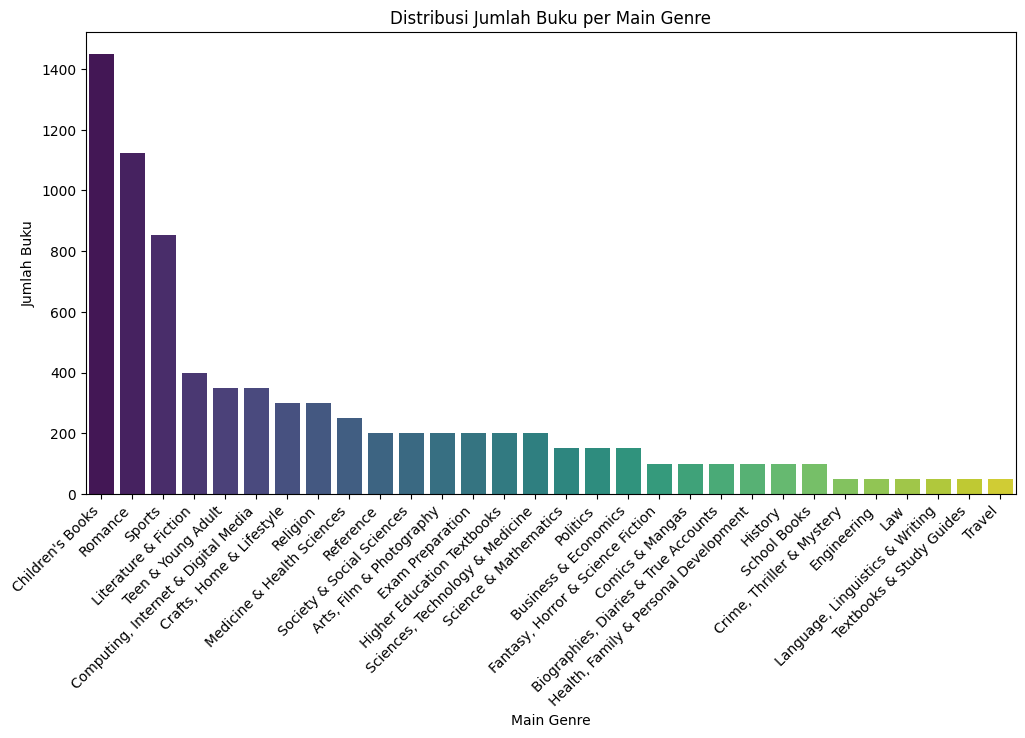

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
genre_counts = Books_df['Main Genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribusi Jumlah Buku per Main Genre')
plt.ylabel('Jumlah Buku')
plt.xlabel('Main Genre')
plt.show()


**Insight :**

Grafik ini menunjukkan genre buku mana yang paling banyak jumlahnya:

- Buku Anak-anak paling banyak: Genre "Children's Books" memiliki jumlah buku terbanyak, yaitu lebih dari 1400 buku.

- Romantis dan Olahraga populer berikutnya: Genre "Romance" berada di urutan kedua, diikuti oleh "Sports". Keduanya juga memiliki jumlah buku yang signifikan.

- Banyak genre dengan jumlah lebih sedikit: Setelah beberapa genre teratas, ada banyak genre lain dengan jumlah buku yang lebih kecil, dan daftarnya cukup panjang. Ini menunjukkan variasi genre yang luas, meskipun beberapa genre jauh lebih dominan daripada yang lain.

### 2. Distribusi Rating Buku

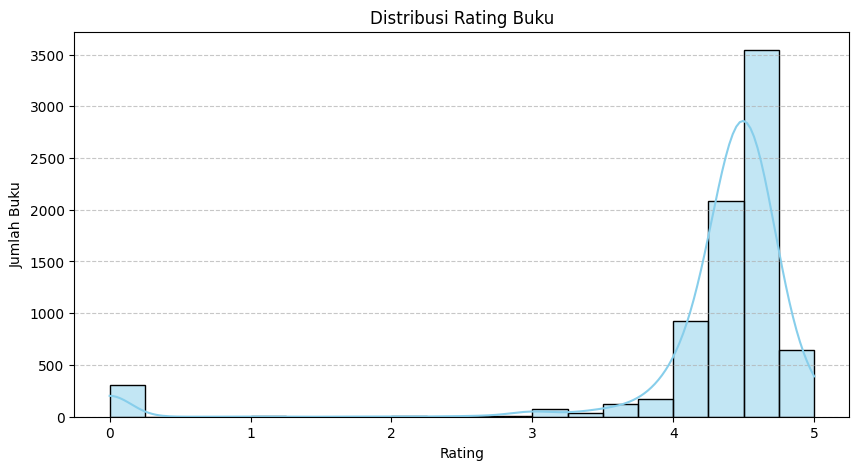

In [53]:
plt.figure(figsize=(10,5))
sns.histplot(Books_df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Rating Buku')
plt.xlabel('Rating')
plt.ylabel('Jumlah Buku')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Insight :**

Grafik ini menunjukkan sebaran rating yang diterima buku-buku:

- Mayoritas buku dapat rating sangat tinggi: Sebagian besar buku mendapatkan rating antara 4.0 hingga 5.0, dengan puncak tertinggi ada di sekitar rating 4.5. Ini berarti banyak buku yang dinilai sangat baik.

- Rating rendah jarang ditemui: Sangat sedikit buku yang memiliki rating antara 1.0 hingga 3.5.

- Ada kelompok buku dengan rating nol: Terdapat sejumlah buku yang memiliki rating 0. Ini bisa berarti buku tersebut belum
diberi rating, atau memang mendapat nilai nol.

- Cenderung ke nilai bagus: Secara keseluruhan, distribusi rating ini "miring ke kiri", yang artinya kebanyakan buku cenderung mendapatkan nilai di sisi kanan (nilai tinggi) skala rating.

### 3. Distribusi Jumlah Orang yang Memberi Rating

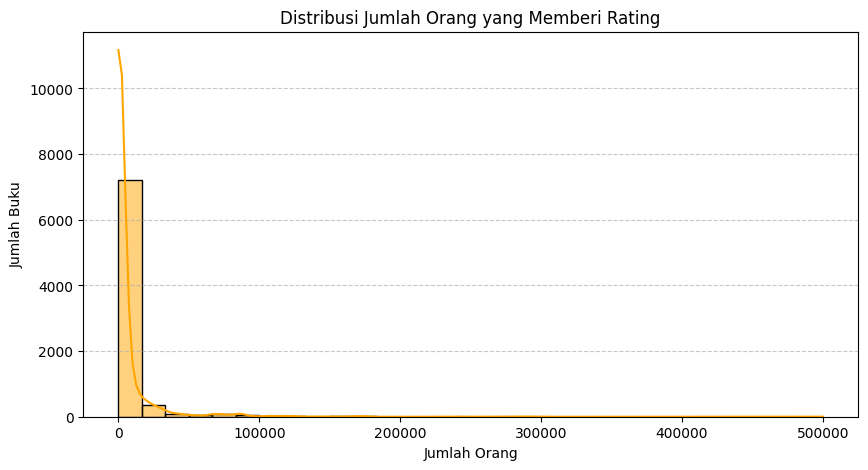

In [54]:
plt.figure(figsize=(10,5))
sns.histplot(Books_df['No. of People rated'], bins=30, kde=True, color='orange')
plt.title('Distribusi Jumlah Orang yang Memberi Rating')
plt.xlabel('Jumlah Orang')
plt.ylabel('Jumlah Buku')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Insight :**

Grafik ini menunjukkan seberapa banyak orang yang memberikan rating untuk tiap buku:

- Kebanyakan buku dirating oleh sedikit orang: Sebagian besar buku (lebih dari 7000 buku) hanya mendapatkan rating dari sejumlah kecil orang. Ini ditunjukkan oleh batang yang sangat tinggi di sisi kiri grafik.

- Sedikit buku yang dirating oleh banyak orang: Hanya sejumlah kecil buku yang mendapatkan rating dari puluhan ribu hingga ratusan ribu orang. Jumlah buku ini menurun drastis seiring bertambahnya jumlah orang yang memberi rating.

- Distribusi "berat di kiri": Artinya, sangat umum buku hanya diulas oleh sedikit orang, dan sangat jarang ada buku yang diulas oleh kerumunan besar.

Intinya: Mayoritas buku hanya menerima ulasan dari sejumlah kecil pembaca, sementara hanya segelintir buku "super populer" yang berhasil menarik perhatian dan ulasan dari banyak sekali orang.

### 4. Genre Paling Populer (Main Genre)

<ipython-input-55-4f086d9ffcd8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_genres.values, y=popular_genres.index, palette='Set2')


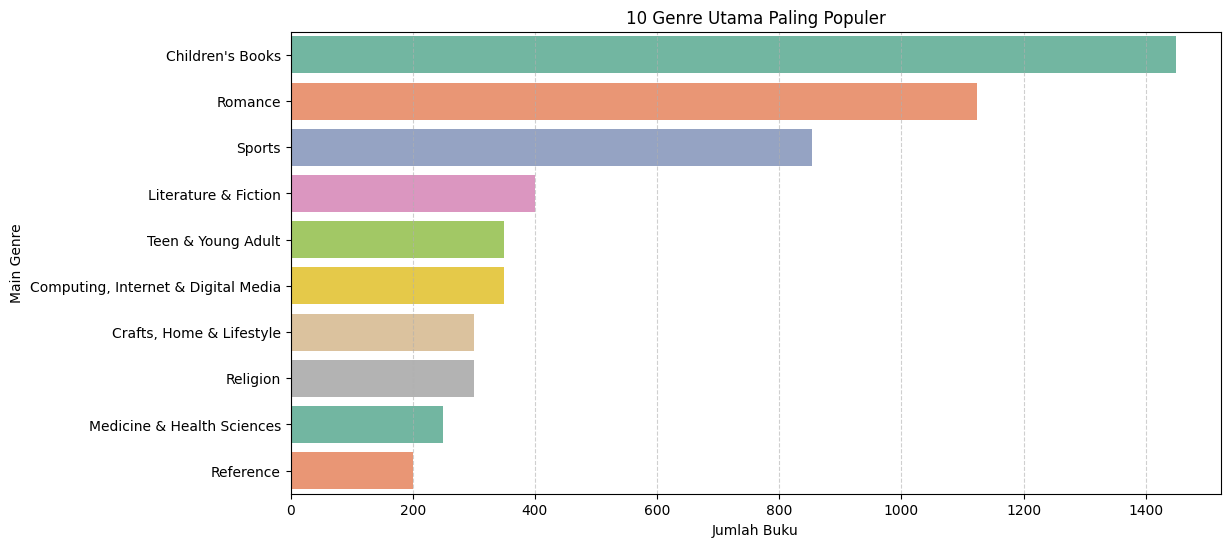

In [55]:
plt.figure(figsize=(12,6))
popular_genres = Books_df['Main Genre'].value_counts().head(10)
sns.barplot(x=popular_genres.values, y=popular_genres.index, palette='Set2')
plt.title('10 Genre Utama Paling Populer')
plt.xlabel('Jumlah Buku')
plt.ylabel('Main Genre')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


**Insight :**

Grafik ini menunjukkan 10 genre buku yang paling banyak jumlahnya:

- Buku Anak-anak juaranya: Genre "Children's Books" adalah yang paling populer dengan jumlah buku terbanyak, mencapai lebih dari 1400 buku.

- Romantis dan Olahraga menyusul: Di posisi kedua ada "Romance" dengan sekitar 1100-an buku, diikuti oleh "Sports" di posisi ketiga dengan sekitar 850-an buku.

- Penurunan jumlah yang jelas: Setelah tiga besar, jumlah buku untuk genre-genre berikutnya menurun secara bertahap. Misalnya, "Literature & Fiction" dan "Teen & Young Adult" memiliki sekitar 350-400 buku.

- Variasi di 10 besar: Genre seperti "Computing", "Crafts, Home & Lifestyle", "Religion", "Medicine & Health Sciences", hingga "Reference" melengkapi daftar 10 besar, meskipun dengan jumlah buku yang lebih sedikit dibandingkan tiga teratas.

### 5. Sub Genre Paling Populer

<ipython-input-56-c39232d7fdd2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_subgenres.values, y=popular_subgenres.index, palette='Set3')


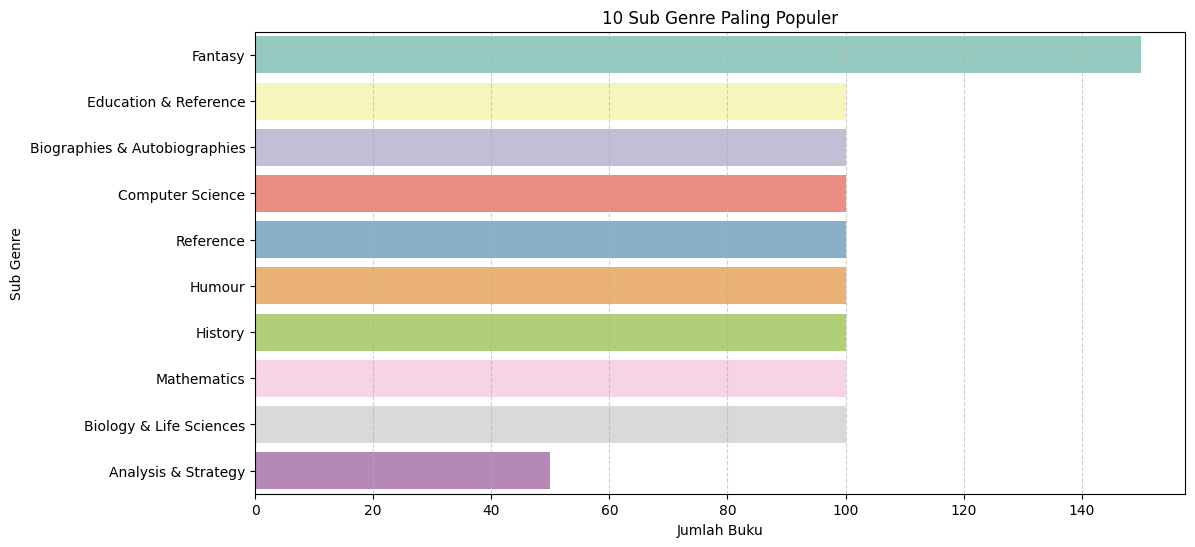

In [56]:
plt.figure(figsize=(12,6))
popular_subgenres = Books_df['Sub Genre'].value_counts().head(10)
sns.barplot(x=popular_subgenres.values, y=popular_subgenres.index, palette='Set3')
plt.title('10 Sub Genre Paling Populer')
plt.xlabel('Jumlah Buku')
plt.ylabel('Sub Genre')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


**Insight :**

Grafik ini menampilkan 10 sub-genre buku yang paling banyak ditemukan:

- Fantasi paling unggul: Sub-genre "Fantasy" menempati posisi teratas dengan jumlah buku sekitar 150.

- Beberapa sub-genre bersaing ketat: Di bawah fantasi, ada sekelompok sub-genre seperti "Education & Reference", "Biographies & Autobiographies", "Computer Science", "Reference", "Humour", "History", "Mathematics", dan "Biology & Life Sciences" yang jumlahnya hampir sama, yaitu sekitar 100 buku masing-masing.

- "Analysis & Strategy" melengkapi 10 besar: Sub-genre "Analysis & Strategy" berada di urutan kesepuluh dengan jumlah buku sekitar 50.

### 6. Korelasi antara Rating dan Jumlah Orang yang Memberi Rating

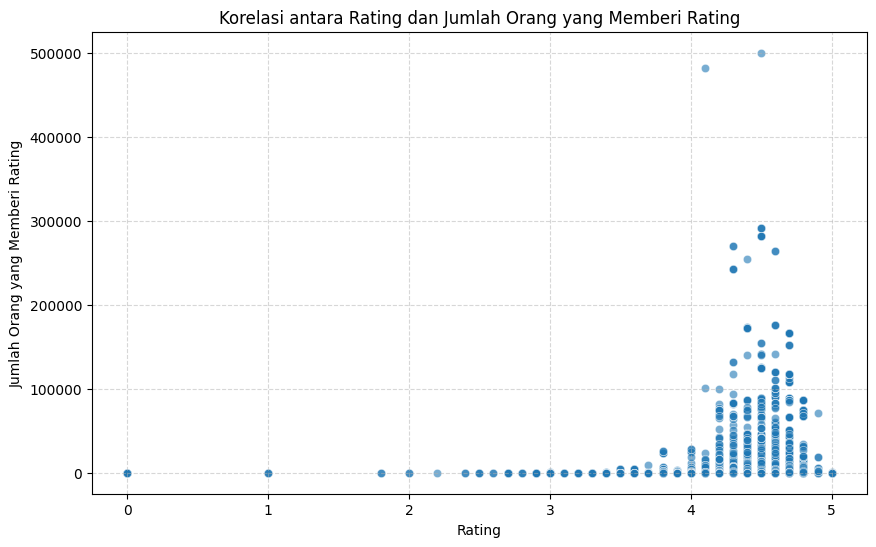

In [57]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=Books_df, x='Rating', y='No. of People rated', alpha=0.6)
plt.title('Korelasi antara Rating dan Jumlah Orang yang Memberi Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah Orang yang Memberi Rating')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


**Insight :**

Grafik ini menunjukkan hubungan antara nilai rating sebuah buku dengan seberapa banyak orang yang memberikan rating tersebut:

- Rating tinggi, bisa banyak pengulas: Buku-buku dengan rating tinggi (terutama antara 4.0 hingga 5.0) memiliki jumlah pengulas yang bervariasi, mulai dari sedikit hingga sangat banyak (ratusan ribu). Titik-titik paling atas (jumlah pengulas terbanyak) semuanya ada di rentang rating ini.

- Rating rendah, cenderung sedikit pengulas: Buku-buku dengan rating rendah (di bawah 3.5, terutama yang sangat rendah seperti 0-2) hampir selalu memiliki jumlah orang yang memberi rating sangat sedikit.

- Pola "corong" ke kanan atas: Secara umum, semakin tinggi rating sebuah buku (bergerak ke kanan), semakin besar kemungkinan buku tersebut mendapatkan banyak ulasan. Buku yang paling banyak diulas orang juga cenderung memiliki rating yang bagus.

## Data Quality Verification

### Cek Books_df

In [59]:
print("==== Books_df ====")

# Cek duplikat
print("Duplikat:", Books_df.duplicated().sum())

# Cek missing values
print("\nMissing Values:")
print(Books_df.isnull().sum())

# Persentase missing
print("\nPersentase Missing Values (%):")
print(Books_df.isnull().mean() * 100)

# Cek nilai unik untuk fitur penting
print("\nNilai unik pada 'Rating':", Books_df['Rating'].unique())
print("Range 'Rating':", Books_df['Rating'].min(), "-", Books_df['Rating'].max())

# Tipe data
print("\nTipe Data:")
print(Books_df.dtypes)


==== Books_df ====
Duplikat: 0

Missing Values:
Unnamed: 0              0
Title                   0
Author                 21
Main Genre              0
Sub Genre               0
Type                    0
Price                   0
Rating                  0
No. of People rated     0
URLs                    0
dtype: int64

Persentase Missing Values (%):
Unnamed: 0             0.000000
Title                  0.000000
Author                 0.264884
Main Genre             0.000000
Sub Genre              0.000000
Type                   0.000000
Price                  0.000000
Rating                 0.000000
No. of People rated    0.000000
URLs                   0.000000
dtype: float64

Nilai unik pada 'Rating': [4.4 4.5 4.6 4.2 4.8 4.7 4.3 0.  5.  4.9 3.6 4.1 3.9 4.  3.8 2.7 3.7 3.3
 3.  3.4 3.5 3.1 2.  2.9 3.2 2.4 2.5 1.8 2.8 2.2 1.  2.6]
Range 'Rating': 0.0 - 5.0

Tipe Data:
Unnamed: 0               int64
Title                   object
Author                  object
Main Genre             

**Insight :**

- Tidak ditemukan baris duplikat.

- Terdapat missing values sebanyak 21 baris pada kolom Author

- Nilai unik dalam Rating cukup bervariasi, dan mencakup rentang penuh dari 0.0 hingga 5.0.

- Semua kolom memiliki tipe data yang sesuai kecuali Price, yang masih berupa object.

### Cek Genre_df

In [64]:
print("==== Genre_df ====")

# Cek duplikat
print("Duplikat:", Genre_df.duplicated().sum())

# Cek missing values
print("\nMissing Values:")
print(Genre_df.isnull().sum())

# Persentase missing
print("\nPersentase Missing Values (%):")
print(Genre_df.isnull().mean() * 100)

# Tipe data
print("\nTipe Data:")
print(Genre_df.dtypes)


==== Genre_df ====
Duplikat: 0

Missing Values:
Title                   0
Number of Sub-genres    0
URL                     0
dtype: int64

Persentase Missing Values (%):
Title                   0.0
Number of Sub-genres    0.0
URL                     0.0
dtype: float64

Tipe Data:
Title                   object
Number of Sub-genres     int64
URL                     object
dtype: object


**Insight :**

- Tidak ditemukan duplikat

- Tidak ada missing values

### Cek Sub_Genre_df

In [62]:
print("==== Sub_Genre_df ====")

# Cek duplikat
print("Duplikat:",Sub_Genre_df.duplicated().sum())

# Cek missing values
print("\nMissing Values:")
print(Sub_Genre_df.isnull().sum())

# Persentase missing
print("\nPersentase Missing Values (%):")
print(Sub_Genre_df.isnull().mean() * 100)

# Tipe data
print("\nTipe Data:")
print(Sub_Genre_df.dtypes)


==== Sub_Genre_df ====
Duplikat: 0

Missing Values:
Title           0
Main Genre      0
No. of Books    0
URLs            0
dtype: int64

Persentase Missing Values (%):
Title           0.0
Main Genre      0.0
No. of Books    0.0
URLs            0.0
dtype: float64

Tipe Data:
Title            object
Main Genre       object
No. of Books    float64
URLs             object
dtype: object


**Insight :**

- Tidak ditemukan duplikat

- Tidak ada missing values

- Kolom No. of Books bertipe float64, namun seharusnya secara logis merupakan bilangan bulat (jumlah buku).

# Data Preparation

## Data Cleaning

### Data Cleaning — Books_df

1. Hapus kolom Unnamed: 0 (karna tidak diperlukan)

In [65]:
Books_df.drop(columns=['Unnamed: 0'], inplace=True)

2. Tangani nilai missing pada kolom Author

In [66]:
Books_df.dropna(subset=['Author'], inplace=True)

3. Bersihkan dan konversi kolom Price (karena masih bertipe object)

In [68]:
Books_df['Price'] = Books_df['Price'].replace('[\$\,₹]', '', regex=True).astype(float)

In [71]:
Books_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7601 entries, 0 to 7927
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                7601 non-null   object 
 1   Author               7601 non-null   object 
 2   Main Genre           7601 non-null   object 
 3   Sub Genre            7601 non-null   object 
 4   Type                 7601 non-null   object 
 5   Price                7601 non-null   float64
 6   Rating               7601 non-null   float64
 7   No. of People rated  7601 non-null   float64
 8   URLs                 7601 non-null   object 
dtypes: float64(3), object(6)
memory usage: 593.8+ KB


### Data Cleaning — Genre_df dan Sub_Genre_df

 1. Konversi No. of Books ke int :

In [73]:
Genre_df['Number of Sub-genres'] = Genre_df['Number of Sub-genres'].astype(int)
Sub_Genre_df['No. of Books'] = Sub_Genre_df['No. of Books'].astype(int)

In [74]:
Genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 35 non-null     object
 1   Number of Sub-genres  35 non-null     int64 
 2   URL                   35 non-null     object
dtypes: int64(1), object(2)
memory usage: 972.0+ bytes


In [75]:
Sub_Genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         329 non-null    object
 1   Main Genre    329 non-null    object
 2   No. of Books  329 non-null    int64 
 3   URLs          329 non-null    object
dtypes: int64(1), object(3)
memory usage: 10.4+ KB


## Menggabungkan Kolom

In [76]:
# Menggabungkan kolom 'Main Genre', 'Sub Genre', dan 'Author' menjadi satu string per baris
Books_df['content_features'] = (
    Books_df['Main Genre'] + ' ' +
    Books_df['Sub Genre'] + ' ' +
    Books_df['Author']
)

# Menampilkan beberapa contoh hasil
Books_df[['Title', 'content_features']].head()

,Title,content_features
0,The Complete Novel of Sherlock Holmes,"Arts, Film & Photography Cinema & Broadcast Ar..."
1,Black Holes (L) : The Reith Lectures [Paperbac...,"Arts, Film & Photography Cinema & Broadcast St..."
2,The Kite Runner,"Arts, Film & Photography Cinema & Broadcast Kh..."
3,Greenlights: Raucous stories and outlaw wisdom...,"Arts, Film & Photography Cinema & Broadcast Ma..."
4,The Science of Storytelling: Why Stories Make ...,"Arts, Film & Photography Cinema & Broadcast Wi..."


## Encoding (TF-IDF Vectorization)

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Transformasi content_features menjadi matriks TF-IDF
tfidf_matrix = tfidf.fit_transform(Books_df['content_features'])

# Cek ukuran matriks
print("Ukuran TF-IDF Matrix:", tfidf_matrix.shape)


Ukuran TF-IDF Matrix: (7601, 4767)


# Modeling

In [80]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity antar semua buku
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Cek bentuk matriks kemiripan
print("Ukuran matriks cosine similarity:", cosine_sim.shape)


Ukuran matriks cosine similarity: (7601, 7601)


In [111]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Buat indeks judul buku -> index buku
indices = pd.Series(Books_df.index, index=Books_df['Title']).drop_duplicates()

def recommend_books(title, cosine_sim=cosine_sim, df=Books_df, top_n=5):
    if title not in indices.index:
        return f"Maaf, judul '{title}' tidak ditemukan dalam data."

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = list(enumerate(cosine_sim[idx].flatten()))
    sim_scores = sim_scores[1:top_n+1]
    book_indices = [i[0] for i in sim_scores]
    result = df.iloc[book_indices][['Title', 'Author', 'Rating']]
    return result.reset_index(drop=True)


# Contoh penggunaan:
recommend_books("Harry Potter and the Philosopher's Stone", top_n=5)

,Title,Author,Rating
0,Black Holes (L) : The Reith Lectures [Paperbac...,Stephen Hawking,4.5
1,The Kite Runner,Khaled Hosseini,4.6
2,Greenlights: Raucous stories and outlaw wisdom...,Matthew McConaughey,4.6
3,The Science of Storytelling: Why Stories Make ...,Will Storr,4.5
4,Fantastic Beasts and Where to Find Them: The O...,J.K. Rowling,4.5


# Evaluation

## Penjelasan Metrik yang digunakan

Metrik yang digunakan untuk mengevaluasi seberapa baik model *content-based filtering* dalam memberikan rekomendasi adalah **Precision\@k**, **Recall\@k**, dan **F1-Score\@k**.

Metrik-metrik ini merupakan bagian dari evaluasi berbasis relevansi, yang biasa digunakan dalam sistem rekomendasi dan *information retrieval*.

1. **Precision\@k**
   Precision\@k digunakan untuk mengukur proporsi item yang relevan dari total item yang direkomendasikan sebanyak *k*.
   Artinya, metrik ini menunjukkan seberapa **tepat** sistem dalam memberikan rekomendasi.
   Formula:

   $$
   \text{Precision@k} = \frac{\text{Jumlah item relevan dalam rekomendasi}}{k}
   $$

2. **Recall\@k**
   Recall\@k digunakan untuk mengukur proporsi item relevan yang berhasil ditemukan oleh sistem dari seluruh item relevan yang tersedia.
   Metrik ini menunjukkan seberapa **lengkap** sistem dalam menangkap item relevan.
   Formula:

   $$
   \text{Recall@k} = \frac{\text{Jumlah item relevan dalam rekomendasi}}{\text{Jumlah total item relevan}}
   $$

3. **F1-Score\@k**
   F1-Score\@k merupakan rata-rata harmonik dari Precision dan Recall. Metrik ini digunakan untuk memberikan keseimbangan antara ketepatan dan kelengkapan rekomendasi.
   Formula:

   $$
   \text{F1-Score@k} = \frac{2 \times \text{Precision@k} \times \text{Recall@k}}{\text{Precision@k} + \text{Recall@k}}
   $$


## Contoh Penerapan

In [112]:
# 1. Membuat ground truth
ground_truth = {
    "Harry Potter and the Philosopher's Stone": {
        "Black Holes (L) : The Reith Lectures [Paperback] Hawking, Stephen",
        "The Kite Runner",
        "Greenlights: Raucous stories and outlaw wisdom from the Academy Award-winning actor",
        "The Science of Storytelling: Why Stories Make Us Human, and How to Tell Them Better",
        "Fantastic Beasts and Where to Find Them: The Original Screenplay"

    }
}


In [115]:
def evaluate_single_recommendation(title, recommend_func, ground_truth, k=5):
    """
    Evaluasi rekomendasi untuk satu judul buku menggunakan metrik Precision, Recall, dan F1-Score.

    Args:
        title (str): Judul buku yang dijadikan input rekomendasi.
        recommend_func (function): Fungsi rekomendasi yang mengembalikan DataFrame rekomendasi.
        ground_truth (dict): Kamus dengan key judul buku, value adalah set judul buku relevan (ground truth).
        k (int): Jumlah rekomendasi teratas yang dievaluasi.

    Returns:
        dict: Berisi nilai Precision@k, Recall@k, F1-Score@k, dan list buku relevan yang ditemukan.
    """
    # Memanggil fungsi rekomendasi untuk mendapatkan rekomendasi top-k
    rekomendasi_df = recommend_func(title, top_n=k)

    # Jika fungsi rekomendasi mengembalikan string error, langsung return
    if isinstance(rekomendasi_df, str):
        return {'Error': rekomendasi_df}

    # Ambil judul buku yang direkomendasikan sebagai set
    rekomendasi_set = set(rekomendasi_df['Title'])

    # Ambil set ground truth relevan untuk judul tersebut, jika ada
    relevan_set = ground_truth.get(title, set())

    # Hitung true positives (tumpang tindih rekomendasi dan ground truth)
    true_positives = rekomendasi_set.intersection(relevan_set)

    # Hitung metrik evaluasi
    precision = len(true_positives) / k if k > 0 else 0
    recall = len(true_positives) / len(relevan_set) if relevan_set else 0
    if precision + recall > 0:
        f1_score = 2 * precision * recall / (precision + recall)
    else:
        f1_score = 0

    return {
        f'Precision@{k}': round(precision, 4),
        f'Recall@{k}': round(recall, 4),
        f'F1-Score@{k}': round(f1_score, 4),
        'Relevant Found': list(true_positives)
    }


In [117]:
# Contoh panggilan fungsi evaluasi untuk buku dengan judul tertentu
hasil_evaluasi = evaluate_single_recommendation(
    "Harry Potter and the Philosopher's Stone",  # Judul buku yang ingin dievaluasi
    recommend_books,                              # Fungsi rekomendasi yang sudah dibuat
    ground_truth,                                 # Kamus ground truth relevan untuk evaluasi
    k=5                                           # Jumlah rekomendasi teratas yang dievaluasi
)

hasil_evaluasi


{'Precision@5': 1.0,
 'Recall@5': 1.0,
 'F1-Score@5': 1.0,
 'Relevant Found': ['The Kite Runner',
  'Black Holes (L) : The Reith Lectures [Paperback] Hawking, Stephen',
  'Fantastic Beasts and Where to Find Them: The Original Screenplay',
  'The Science of Storytelling: Why Stories Make Us Human, and How to Tell Them Better',
  'Greenlights: Raucous stories and outlaw wisdom from the Academy Award-winning actor']}

**Insight:**

- Precision@5 = 1.0
Semua 5 buku yang direkomendasikan benar-benar relevan dengan buku yang dijadikan acuan ("Harry Potter and the Philosopher's Stone"). Tidak ada rekomendasi yang kurang tepat atau tidak sesuai.

- Recall@5 = 1.0
Dari semua buku relevan yang sebenarnya ada di data ground truth untuk buku tersebut, sistem berhasil menemukan semuanya dalam rekomendasi top 5. Ini berarti sistem tidak melewatkan buku relevan sama sekali dalam rekomendasi teratas.

- F1-Score@5 = 1.0
Kombinasi precision dan recall sempurna, menunjukkan performa sistem rekomendasi sangat baik pada contoh ini.

- Relevant Found
Daftar buku yang direkomendasikan dan dianggap relevan oleh sistem, seperti:
1. The Kite Runner
2. Black Holes (L) : The Reith Lectures
3. Fantastic Beasts and Where to Find Them
4. The Science of Storytelling
5. Greenlights

**Kesimpulan:**

Sistem rekomendasi ini sangat efektif untuk buku yang diuji—menyajikan rekomendasi yang tepat dan lengkap dalam jumlah yang dibatasi. Namun, untuk penilaian yang lebih menyeluruh, evaluasi perlu dilakukan untuk banyak judul buku lain juga agar dapat melihat konsistensi performa secara keseluruhan.

# Menjawab Problems

### 1. Menemukan Novel Paling Populer dan Disukai

In [120]:
# Top 10 buku dengan rating tertinggi (minimum 50 ulasan)
top_books = Books_df[Books_df['No. of People rated'] >= 50].sort_values(by='Rating', ascending=False).head(10)
top_books[['Title', 'Author', 'Main Genre', 'Sub Genre', 'Rating', 'No. of People rated']]

,Title,Author,Main Genre,Sub Genre,Rating,No. of People rated
3193,Spreading Joy: How Joyalukkas Became the World...,Joy Alukkas,Higher Education Textbooks,Business & Finance,5.0,1274.0
7898,National Geographic Bucket List Family Travel:...,Jessica Gee,Travel,Travel & Holiday Guides,5.0,239.0
4143,Vax-Unvax: Let the Science Speak (Children's H...,Brian Hooker,Medicine & Health Sciences,Research,4.9,291.0
1979,"One Piece, Vol. 104 (Volume 104)",Eiichiro Oda,Comics & Mangas,Mangas,4.9,227.0
994,In a New World: Book 17 (Steve the Noob in a N...,Steve the Noob,Children's Books,"Fantasy, Science Fiction & Horror",4.9,564.0
7658,Shivdas CBSE Class 12 Business Studies 15+1 Pa...,Shivdas Editorial,Teen & Young Adult,Hobbies & Games,4.9,51.0
3899,Ishq Baghawat । Ishq Bagawat । इश्क़ बग़ावत [ ...,Ritesh Rajwada,Literature & Fiction,Poetry,4.9,73.0
7495,"Straight Up: Honest, Unfiltered, As-Real-As-I-...",Trent Shelton,Teen & Young Adult,Biographies,4.9,1070.0
6127,"Good News, Planet Eath",Author Sam Bentley,Science & Mathematics,Environmental Studies,4.9,62.0
4653,S ISLAMIC STORE original product - The Holy Qu...,Allah,Religion,Islam,4.9,788.0


**Insight:**

1. Semua Buku Sangat Disukai Pembaca
Semua buku memiliki rating sangat tinggi, yaitu 4.9 hingga 5.0.

Ini menunjukkan bahwa buku-buku ini sangat memenuhi ekspektasi pembaca.

2. Genre Beragam dan Tidak Terbatas pada Fiksi. Bukan hanya novel atau fiksi yang populer, tapi juga:

- Bisnis & Keuangan: Spreading Joy (5.0, 1274 rating)

- Travel Guide: Bucket List Family Travel (5.0, 239 rating)

- Komik/Manga: One Piece Vol. 104 (4.9, 227 rating)

- Health/Science: Vax-Unvax, Environmental Studies

- Religi: The Holy Quran (4.9, 788 rating)

Ini menunjukkan bahwa preferensi pembaca sangat beragam, mencakup edukasi, hiburan, religi, dan inspirasi pribadi.

3. Penulis Terkenal dan Pengaruh Sosial
Penulis seperti Eiichiro Oda (One Piece) dan Allah (The Holy Quran) menunjukkan:

- Kekuatan nama besar dan pengaruh dalam menarik rating tinggi.

- Buku dari figur publik atau influencer juga menonjol, seperti:

- Trent Shelton – Seorang motivator dengan buku “Straight Up” (4.9, 1070 rating)



### 2. Analisis Fitur yang Mempengaruhi Kesukaan Pembaca

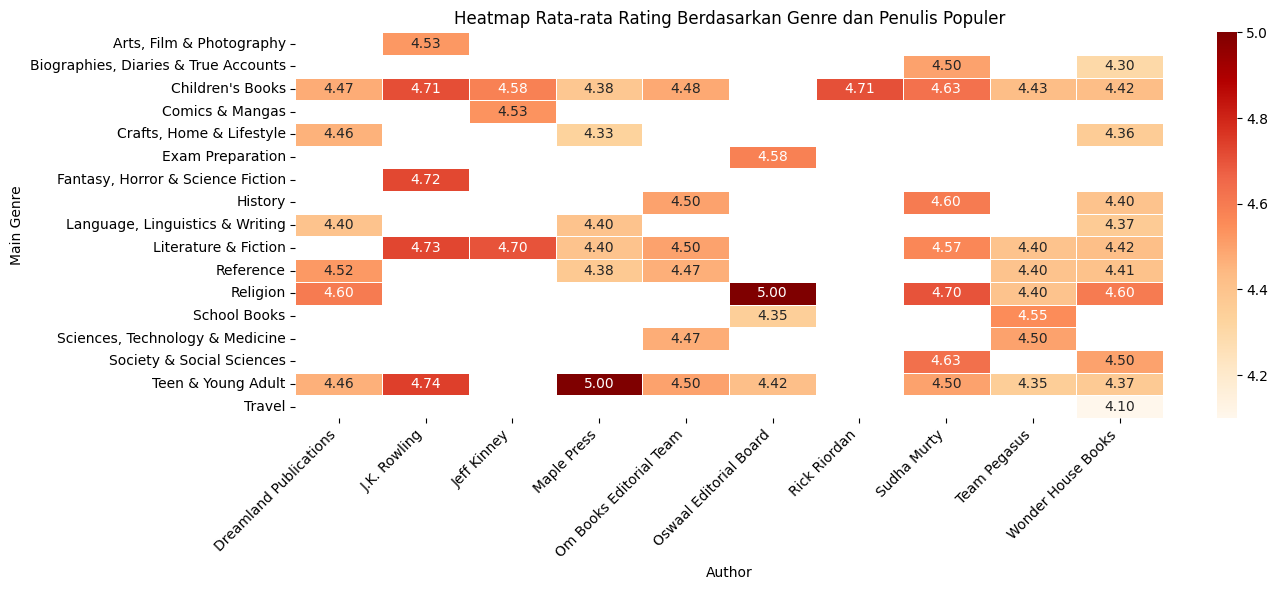

In [126]:
# Ambil 10 penulis dengan jumlah buku terbanyak
top_authors = Books_df['Author'].value_counts().head(10).index
filtered_df = Books_df[Books_df['Author'].isin(top_authors)]

# Buat pivot table
pivot_author = filtered_df.pivot_table(values='Rating',
                                       index='Main Genre',
                                       columns='Author',
                                       aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_author, annot=True, fmt=".2f", cmap="OrRd", linewidths=0.5)
plt.title('Heatmap Rata-rata Rating Berdasarkan Genre dan Penulis Populer')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Insight:**

Heatmap ini menunjukkan rata-rata rating buku berdasarkan kombinasi genre utama dan penulis populer:

- Rating Sempurna (5.00): Beberapa penulis mencapai rating sempurna 5.00 di genre tertentu:
"Oswaal Editorial Board" untuk genre "Reference".
"Maple Press" untuk genre "Teen & Young Adult".

- Penulis dengan Rating Tinggi Konsisten:
1. J.K. Rowling mendapatkan rating sangat tinggi (sekitar 4.7) untuk genre "Children's Books", "Fantasy, Horror & Science Fiction", dan "Literature & Fiction".
2. Sudha Murty secara konsisten mendapatkan rating tinggi (sekitar 4.50 - 4.63) di berbagai genre seperti "Biographies", "Children's Books", "History", "Literature & Fiction", "Society & Social Sciences", dan "Teen & Young Adult".
3. Rick Riordan juga sangat tinggi (4.71) di "Children's Books".

- Genre Populer dengan Rating Tinggi:
1. "Children's Books" secara umum mendapat rating tinggi dari banyak penulis populer yang tercantum.
2. "Literature & Fiction" juga menunjukkan rating tinggi dari beberapa penulis seperti J.K. Rowling dan Maple Press.

- Spesialisasi Penulis: Beberapa penulis menunjukkan keunggulan di genre spesifik, seperti "Jeff Kinney" di "Children's Books" (4.58) dan "Comics & Mangas" (4.53).

- Variasi Rating: Meskipun sebagian besar rating yang ditampilkan tinggi (di atas 4.3), ada variasi tergantung pada penulis dan genre. Warna yang lebih gelap menunjukkan rating yang lebih tinggi.

Intinya: Penulis-penulis populer dalam daftar ini umumnya memiliki rata-rata rating yang sangat baik di genre-genre utama mereka, dengan beberapa kombinasi penulis dan genre bahkan mencapai rating sempurna. Genre seperti "Children's Books" secara konsisten menerima rating tinggi dari berbagai penulis ternama.



### 3. Mengetahui cara membuat sistem rekomendasi terbaik yang dapat diimplementasikan.

In [128]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Buat indeks judul buku -> index buku
indices = pd.Series(Books_df.index, index=Books_df['Title']).drop_duplicates()

def recommend_books(title, cosine_sim=cosine_sim, df=Books_df, top_n=5):
    if title not in indices.index:
        return f"Maaf, judul '{title}' tidak ditemukan dalam data."

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = list(enumerate(cosine_sim[idx].flatten()))
    sim_scores = sim_scores[1:top_n+1]
    book_indices = [i[0] for i in sim_scores]
    result = df.iloc[book_indices][['Title', 'Author', 'Rating']]
    return result.reset_index(drop=True)


# Contoh penggunaan:
recommend_books("Harry Potter and the Philosopher's Stone", top_n=5)

,Title,Author,Rating
0,Black Holes (L) : The Reith Lectures [Paperbac...,Stephen Hawking,4.5
1,The Kite Runner,Khaled Hosseini,4.6
2,Greenlights: Raucous stories and outlaw wisdom...,Matthew McConaughey,4.6
3,The Science of Storytelling: Why Stories Make ...,Will Storr,4.5
4,Fantastic Beasts and Where to Find Them: The O...,J.K. Rowling,4.5
